## Notebook del capítulo 5

In [1]:
# 22/5/24
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datos
xn= np.array([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 1.00])
yn= np.array([1.00, 1.64, 1.51, 2.03, 2.75, 3.59, 4.87, 5.23, 5.44, 6.37])

Text(0, 0.5, '$v$ [m/s]')

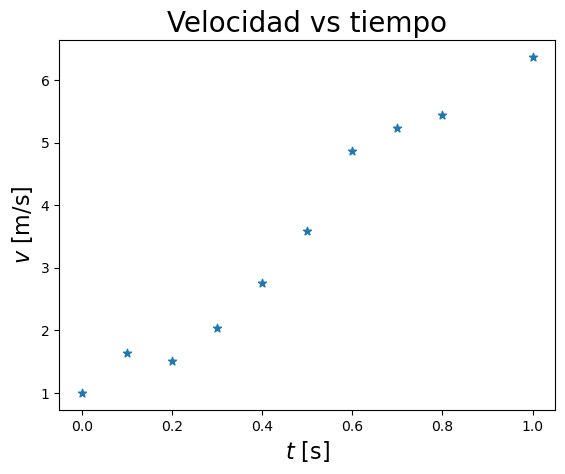

In [3]:
plt.scatter(xn, yn, marker='*') 
plt.title(r'Velocidad vs tiempo', fontsize=20) 
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)

In [4]:
# Se obtiene el valor de n (numero de datos)
n = len(xn)
# Las sumatorias necesarias 
Sum_x = np.sum(xn)
Sum_y = np.sum(yn)
Sum_xx = np.sum(xn**2)
Sum_xy = np.sum(xn*yn)
Sum_xSumy = np.sum(xn)*np.sum(yn)
Delta = n*np.sum(xn**2) - (np.sum(xn))**2
print(n,',', Sum_x, ',',Sum_y,',', Sum_xx,',', Sum_xy,',', Sum_xSumy, ',',Delta)

10 , 4.6 , 34.43 , 3.04 , 21.275 , 158.378 , 9.240000000000002


In [5]:
# Se escriben las ecuaciones para b y m 
m_mc = (n * Sum_xy - Sum_x * Sum_y) / Delta
b_mc = Sum_y /n - m_mc * Sum_x/n
print('m=',m_mc, ',', 'b=',b_mc)

m= 5.884415584415585 , b= 0.7361688311688313


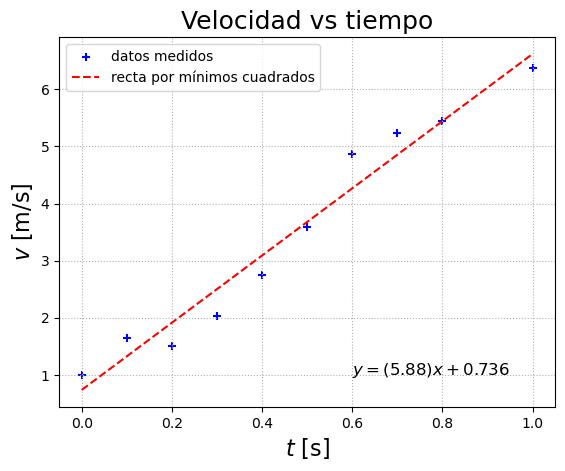

In [6]:
# La gráfica con los datos y la recta que mejor se ajusta 
y_pred= m_mc*xn + b_mc
# 
plt.figure()
plt.scatter(xn, yn, color='b',marker='+', label='datos medidos')
plt.plot(xn, y_pred, 'r--',label='recta por mínimos cuadrados')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.title(r'Velocidad vs tiempo', fontsize=18)
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)
plt.text(0.6, 1.0, '$y=(5.88) x + 0.736$', fontsize=12)
plt.show()

In [7]:
SSE= np.sum((yn -(b_mc + m_mc*xn))**2)
Sy= np.sqrt(SSE/(n-2))
print('n=',n,',','SSE=', SSE ,',', 'Sy=',Sy)

n= 10 , SSE= 1.244265584415585 , Sy= 0.3943769745458628


In [8]:
Delta_m = np.sqrt(n/(n*np.sum(xn ** 2) - np.sum(xn)**2))*Sy
Delta_b = np.sqrt(np.sum(xn**2)/(n*np.sum(xn**2)-np.sum(xn)**2))*Sy
print(f'm = {np.round(m_mc, 1)} \u00B1 {np.round(Delta_m, 1)}')
print(f'b = {np.round(b_mc, 1)} \u00B1 {np.round(Delta_b, 1)}')

m = 5.9 ± 0.4
b = 0.7 ± 0.2


In [9]:
# Ajustar la recta por mínimos cuadrados usando linalg.lstsq
A = np.vstack([xn, np.ones(len(xn))]).T
m_c, b_c = np.linalg.lstsq(A, yn, rcond=None)[0]
print(f'm = {np.round(m_c, 1)}' )
print(f'b = {np.round(b_c, 1)}' )

m = 5.9
b = 0.7


In [10]:
import statsmodels.api as sm

m = 5.8844 ± 0.4103
b = 0.7362 ± 0.2262


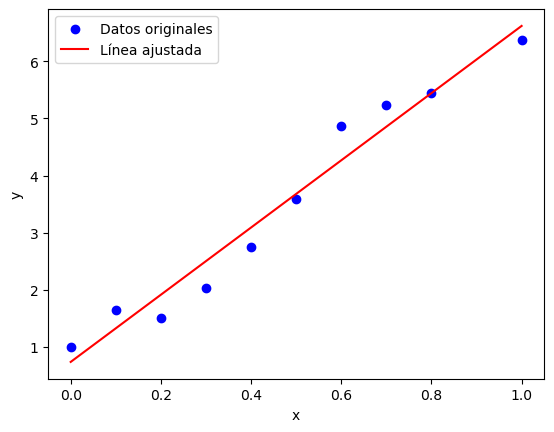

In [11]:
# Agregamos una constante (columna de unos) a xn
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos originales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [13]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     205.7
Date:                Wed, 22 May 2024   Prob (F-statistic):           5.45e-07
Time:                        20:13:43   Log-Likelihood:                -3.7692
No. Observations:                  10   AIC:                             11.54
Df Residuals:                       8   BIC:                             12.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7362      0.226      3.254      0.0

/Users/hector/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
